In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Number of null values in each column and its percentage

In [4]:
print(df.isnull().sum())
print(df.isnull().sum()/df.shape[0]*100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print(10*"*")

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
**********
Sex
male      577
female    314
Name: count, dtype: int64
**********
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
**********
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Count plots to visualise survival's comparison to numeric data points

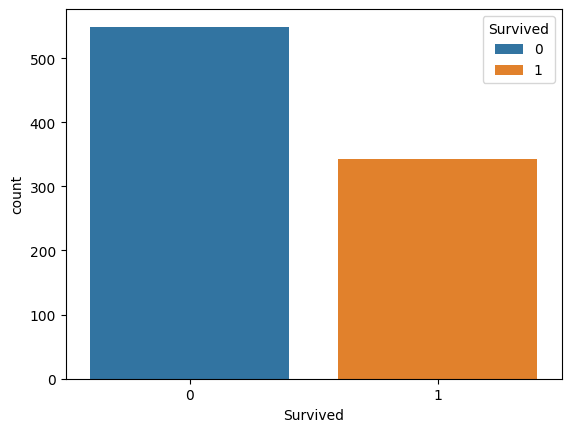

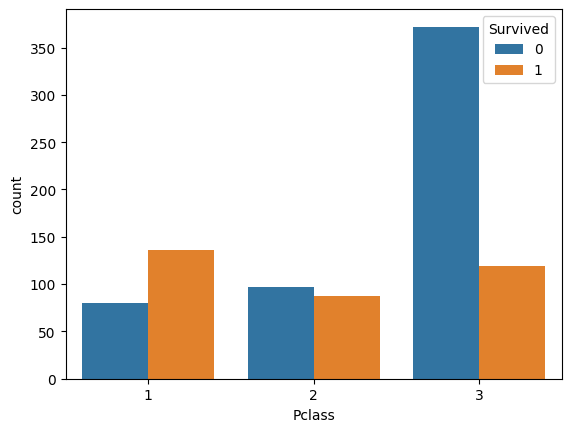

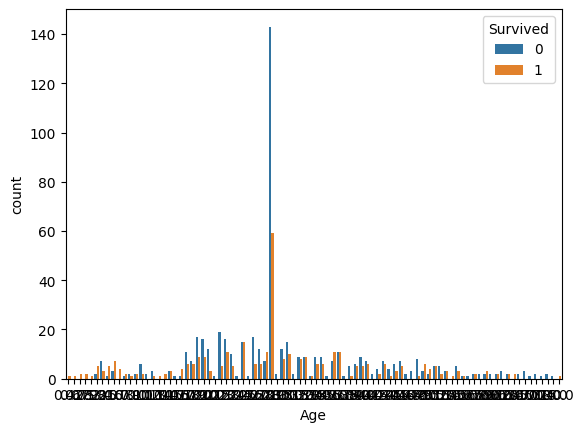

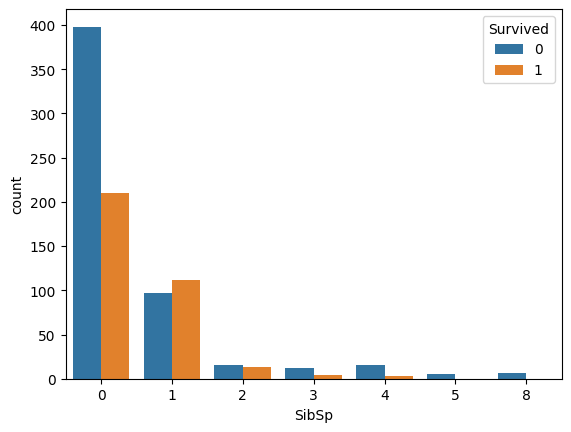

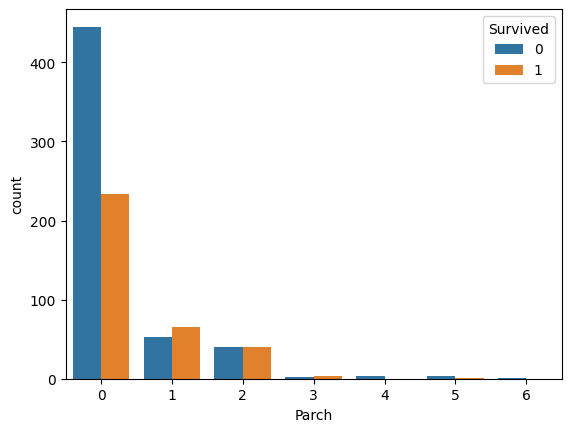

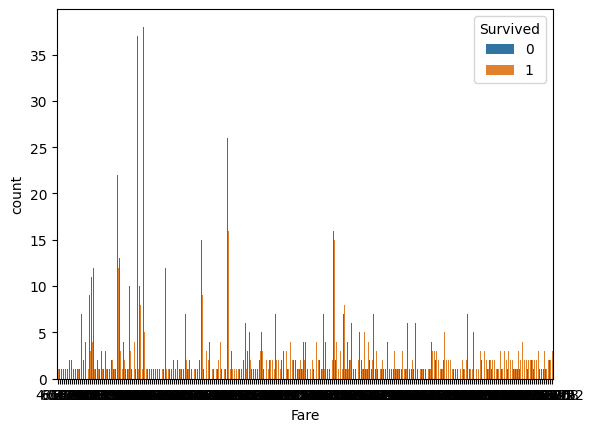

In [40]:
for i in df.select_dtypes(include="number").columns:
    sns.countplot(data=df,x = i,hue='Survived')
    plt.show()

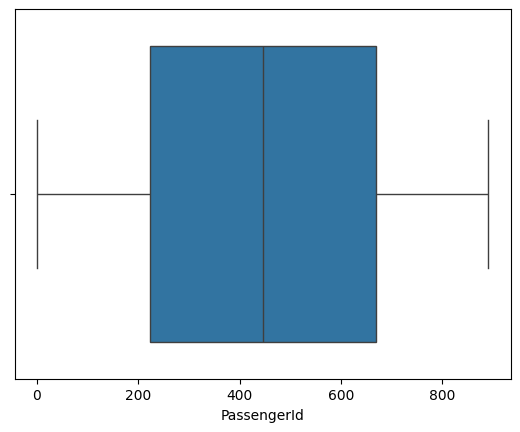

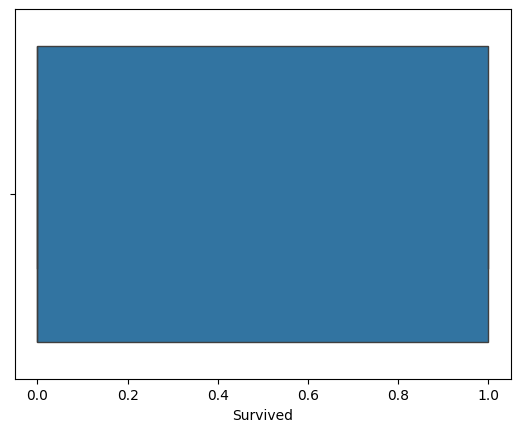

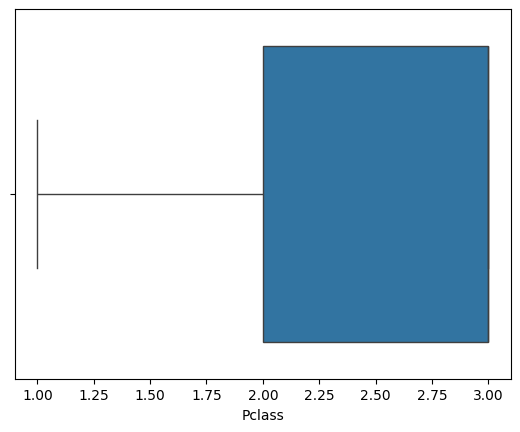

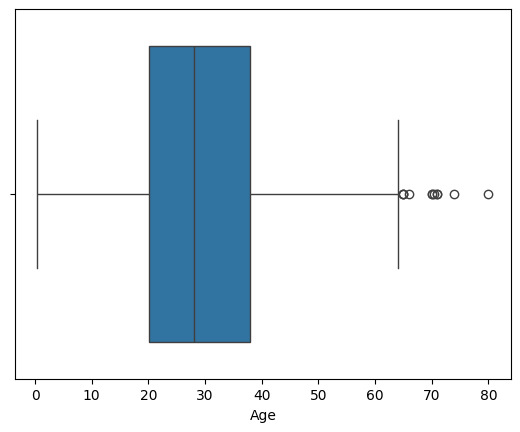

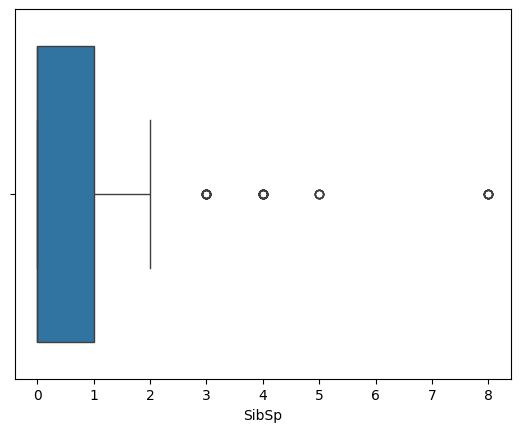

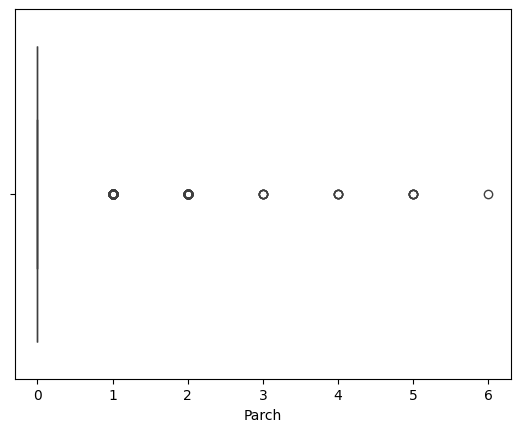

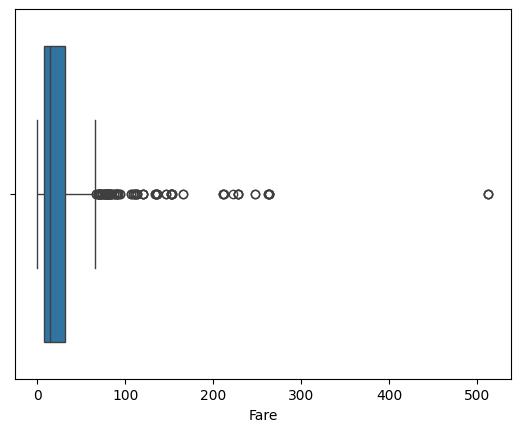

In [11]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [12]:
s=df.select_dtypes(include="number").corr()
s

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Visualising correlation of the numeric data with eachother

<Axes: >

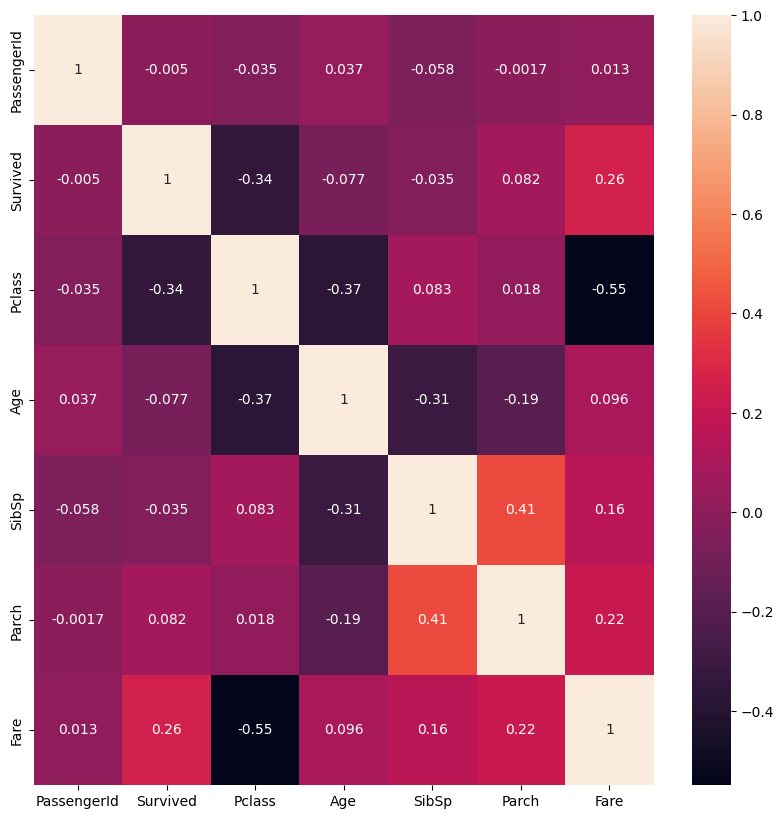

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

In [14]:
#Relation of survival with passenger class
p1=df[((df["Survived"]==1)&(df["Pclass"]==1))].shape[0]
p2=df[(df["Survived"]==1)&(df["Pclass"]==2)].shape[0]
p3=df[(df["Survived"]==1)&(df["Pclass"]==3)].shape[0]
print(p1,p2,p3)
pp1=p1/df[df["Pclass"]==1].shape[0]*100
pp2=p2/df[df["Pclass"]==2].shape[0]*100
pp3=p3/df[df["Pclass"]==3].shape[0]*100
print(pp1,pp2,pp3)

136 87 119
62.96296296296296 47.28260869565217 24.236252545824847


In [15]:
#Relation of survival with age
a=[]
aper=[]
x1=0
for i in range(9):
    a.append(df[((df["Survived"]==1)&(df["Age"]>=x1)&(df["Age"]<x1+10))].shape[0])
    aper.append(a[i]/df[(df["Age"]>=x1)&(df["Age"]<x1+10)].shape[0]*100)
    x1+=10
print(a)
print(aper)

[38, 41, 77, 73, 34, 20, 6, 0, 1]
[61.29032258064516, 40.19607843137255, 35.0, 43.712574850299404, 38.20224719101123, 41.66666666666667, 31.57894736842105, 0.0, 100.0]


In [16]:
#Relation of survival with sex
fem=df[((df["Survived"]==1)&(df["Sex"]=="female"))].shape[0]
mal=df[((df["Survived"]==1)&(df["Sex"]=="male"))].shape[0]
femper=fem/df[df["Sex"]=="female"].shape[0]*100
malper=mal/df[df["Sex"]=="male"].shape[0]*100
print(fem,mal)
print(femper,malper)

233 109
74.20382165605095 18.890814558058924


From the above calculations we can deduce that males were less likely to survive

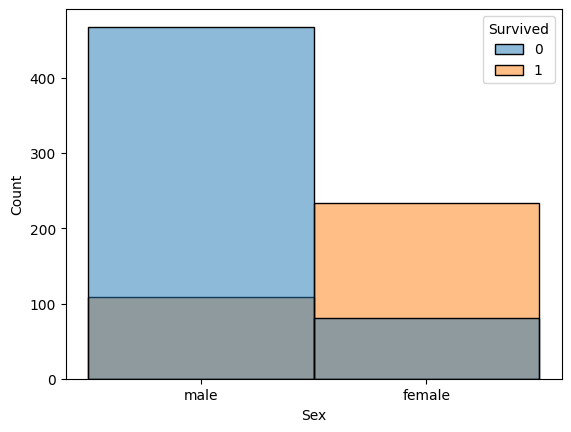

In [17]:
sns.histplot(data=df,x = 'Sex',hue='Survived')
plt.show()

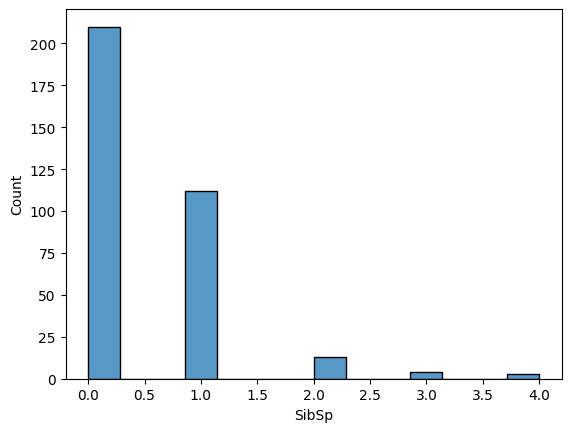

In [18]:
sns.histplot(data=df[(df["Survived"]==1)].SibSp)
plt.show()

In [19]:
#Relation of survival with number of siblings/spouses
sibs=[]
sibsper=[]
x1=0
for i in range(5):
    sibs.append(df[((df["Survived"]==1)&(df["SibSp"]==i))].shape[0])
    sibsper.append(sibs[i]/df[(df["SibSp"]==x1)].shape[0]*100)
    x1+=1
print(sibs)
print(sibsper)

[210, 112, 13, 4, 3]
[34.53947368421053, 53.588516746411486, 46.42857142857143, 25.0, 16.666666666666664]


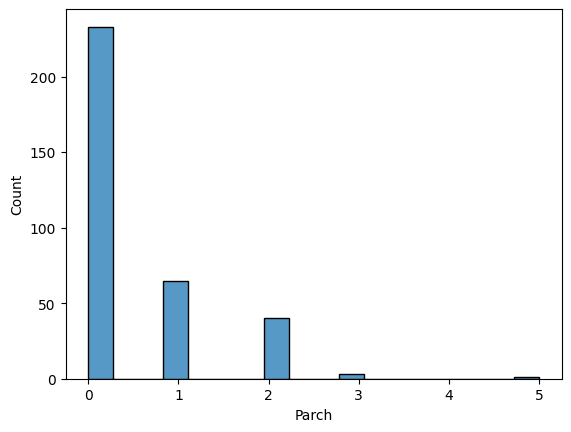

In [20]:
sns.histplot(data=df[(df["Survived"]==1)].Parch)
plt.show()

In [21]:
#Relation of survival with number of parents/children
par=[]
parper=[]
x1=0
for i in range(5):
    par.append(df[((df["Survived"]==1)&(df["Parch"]==i))].shape[0])
    parper.append(par[i]/df[(df["Parch"]==i)].shape[0]*100)
print(par)
print(parper)

[233, 65, 40, 3, 0]
[34.365781710914455, 55.08474576271186, 50.0, 60.0, 0.0]


The last two survival percentages we calculated were regarding family and in both the sets the number of people with no family was much higher than number of people with family so we can deduce that people with no family were less likely to surivive

In [22]:
#Encoding age
sexenc = pd.get_dummies(df.Sex)
df.drop(['Sex'],axis=1,inplace=True)
df= pd.concat([df,sexenc],axis=1)
df.drop(['female'],axis=1,inplace=True)


In [23]:
df["Age"].fillna(df['Age'].describe().loc[['50%']][0], inplace = True)
df["Embarked"].fillna("S", inplace = True) #since s has highest frequency and "Embarked" has low number of null values

In [24]:
df.drop(["PassengerId","Cabin","Name","Ticket"],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True
887,1,1,19.0,0,0,30.0000,S,False
888,0,3,28.0,1,2,23.4500,S,False
889,1,1,26.0,0,0,30.0000,C,True


In [25]:
#Encoding the categorical variable "Embarked"
embarkenc = pd.get_dummies(df['Embarked'])
df.drop(['Embarked'],axis=1,inplace=True)
df = pd.concat([df,embarkenc],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,False,True
889,1,1,26.0,0,0,30.0000,True,True,False,False


ML model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
y=df["Survived"]
X=scaled_df.drop(["Survived"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train,)
y_pred=model.predict(X_test)
print("Accuracy:",model.score(X_test,y_test))
prf=precision_recall_fscore_support(y_test,y_pred,average='binary')
print("Precision:",prf[0])
print("Recall:",prf[1])
print("F1 score:",prf[2])

Accuracy: 0.820627802690583
Precision: 0.7974683544303798
Recall: 0.7241379310344828
F1 score: 0.7590361445783133


In [33]:
'''
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000,10000]
}
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
fclf=clf.fit(X,y)
fclf.best_estimator_'''

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


LogisticRegression(C=0.03359818286283781, solver='liblinear')

In [34]:
'''hypermodel=LogisticRegression(C=0.03359818286283781, solver='liblinear',max_iter=10000)
hypermodel.fit(X_train,y_train,)
y_hyperpred=hypermodel.predict(X_test)
print(hypermodel.score(X_test,y_test))
print(precision_recall_fscore_support(y_test, y_hyperpred,average='binary'))'''

0.7982062780269058
(0.9215686274509803, 0.5340909090909091, 0.6762589928057554, None)
